# Лабораторная работа 1

Выполнила студентка группы БВТ2101 Пьянова Анна

In [1]:
import pandas as pd

data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Определить, сколько мужчин/женщин находилось на борту.

In [2]:
print(data['Sex'].value_counts())

print("Count of male: ", data[data['Sex']=='male']['Sex'].count())
print("Count of female: ", data[data['Sex']=='female']['Sex'].count())

male      577
female    314
Name: Sex, dtype: int64
Count of male:  577
Count of female:  314


2. Вывести распределение переменной Pclass (социально-экономический статус) и это же распределение только для мужчин/женщин по отдельности. Сколько было мужчин 2-го класса?

In [3]:
print("Count of passengers in each class")
print(data['Pclass'].value_counts())
print("Count of male and female in 1 class")
print(data[data['Pclass']==1]['Sex'].value_counts())
print("Count of male and female in 2 class")
print(data[data['Pclass']==2]['Sex'].value_counts())
print("Count of male and female in 3 class")
print(data[data['Pclass']==3]['Sex'].value_counts())

Count of passengers in each class
3    491
1    216
2    184
Name: Pclass, dtype: int64
Count of male and female in 1 class
male      122
female     94
Name: Sex, dtype: int64
Count of male and female in 2 class
male      108
female     76
Name: Sex, dtype: int64
Count of male and female in 3 class
male      347
female    144
Name: Sex, dtype: int64


3.	Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [4]:
print("Median of Fare: ", round(data['Fare'].median(), 2))
print("Standard deviation of Fare: ", round(data['Fare'].std(), 2))

Median of Fare:  14.45
Standard deviation of Fare:  49.69


4.	Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [31]:
print("Age < 30")
print(data[data['Age']<30]['Survived'].value_counts())
print("Age > 60")
print(data[data['Age']>60]['Survived'].value_counts())
print("Shares of survivors")
print("< 30: ", round(data[(data['Age']<30) & data['Survived']==1]['Age'].count() / data[data['Age']<30]['Age'].count(), 2))
print("> 60: ", round(data[(data['Age']>60) & data['Survived']==1]['Age'].count() / data[data['Age']>60]['Age'].count(), 2))

Age < 30
0    228
1    156
Name: Survived, dtype: int64
Age > 60
0    17
1     5
Name: Survived, dtype: int64
Shares of survivors
< 30:  0.41
> 60:  0.23


5.	Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [32]:
print("Survived of male")
print(data[data['Sex']=='male']['Survived'].value_counts())
print("Survived of female")
print(data[data['Sex']=='female']['Survived'].value_counts())
print("Shares of survivors")
print("Male: ", round(data[(data['Sex']=='male') & (data['Survived']==1)]['Sex'].count() / data[data['Sex']=='male']['Sex'].count(), 2))
print("Female: ", round(data[(data['Sex']=='female') & (data['Survived']==1)]['Sex'].count() / data[data['Sex']=='female']['Sex'].count(), 2))

Survived of male
0    468
1    109
Name: Survived, dtype: int64
Survived of female
1    233
0     81
Name: Survived, dtype: int64
Shares of survivors
Male:  0.19
Female:  0.74


6.	Найдите самое популярное имя среди пассажиров Титаника мужского пола.

In [23]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda fullName: fullName.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

7.	Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

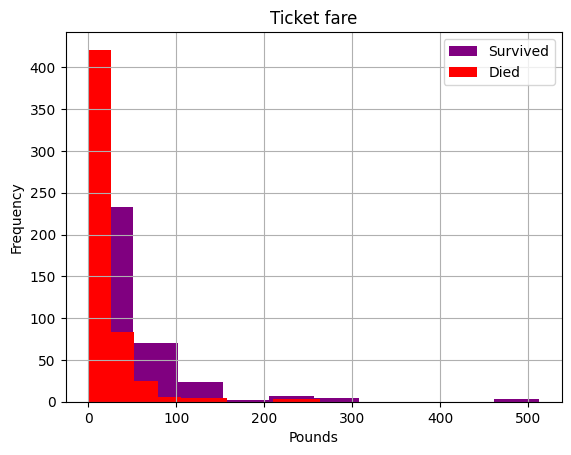

In [33]:
from matplotlib import pyplot as plt

data[data['Survived'] == 1]['Fare'].hist(color="purple", label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="red", label='Died')
plt.title('Ticket fare')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.legend()

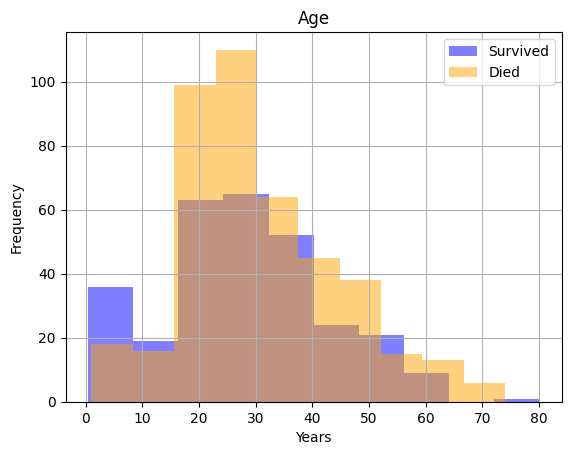

In [27]:
data[data['Survived'] == 1]['Age'].hist(color="blue", label='Survived', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="orange", label='Died', alpha=.5)
plt.title('Age')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

<AxesSubplot: xlabel='Survived', ylabel='Age'>

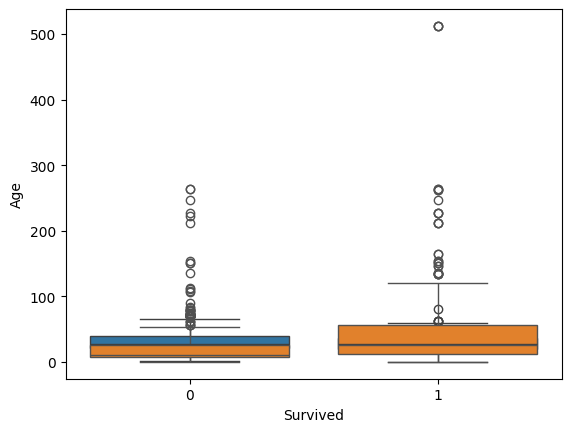

In [29]:
import seaborn as sns

sns.boxplot(x='Survived', y='Age', data=data)
sns.boxplot(x='Survived', y='Fare', data=data)

8.	Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения: 
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [20]:
print("For 1 class")
print("Average age of male: ", data[(data['Pclass']==1) & (data['Sex']=='male')]['Age'].mean())
print("Average age of female: ", data[(data['Pclass']==1) & (data['Sex']=='female')]['Age'].mean())
print("Average age: ", data[data['Pclass']==1]['Age'].mean())
print("For 2 class")
print("Average age of male: ", data[(data['Pclass']==2) & (data['Sex']=='male')]['Age'].mean())
print("Average age of female: ", data[(data['Pclass']==2) & (data['Sex']=='female')]['Age'].mean())
print("Average age: ", data[data['Pclass']==2]['Age'].mean())
print("For 3 class")
print("Average age of male: ", data[(data['Pclass']==3) & (data['Sex']=='male')]['Age'].mean())
print("Average age of female: ", data[(data['Pclass']==3) & (data['Sex']=='female')]['Age'].mean())
print("Average age: ", data[data['Pclass']==3]['Age'].mean())

For 1 class
Average age of male:  41.28138613861386
Average age of female:  34.61176470588235
Average age:  38.233440860215055
For 2 class
Average age of male:  30.74070707070707
Average age of female:  28.722972972972972
Average age:  29.87763005780347
For 3 class
Average age of male:  26.507588932806325
Average age of female:  21.75
Average age:  25.14061971830986
